In [1]:
!pip install kaggle

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:01<00:00, 147MB/s]
100% 163M/163M [00:01<00:00, 141MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  drive  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1363.jpg', 'with_mask_2195.jpg', 'with_mask_1422.jpg', 'with_mask_866.jpg', 'with_mask_1309.jpg']
['with_mask_857.jpg', 'with_mask_947.jpg', 'with_mask_415.jpg', 'with_mask_2224.jpg', 'with_mask_2919.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2580.jpg', 'without_mask_2964.jpg', 'without_mask_2264.jpg', 'without_mask_1672.jpg', 'without_mask_423.jpg']
['without_mask_1452.jpg', 'without_mask_3600.jpg', 'without_mask_1823.jpg', 'without_mask_3110.jpg', 'without_mask_2536.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

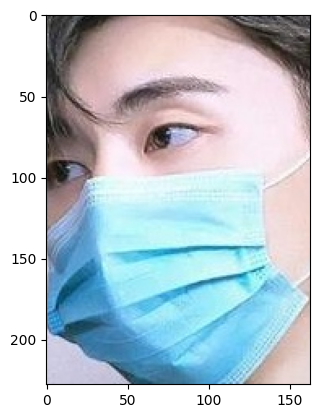

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

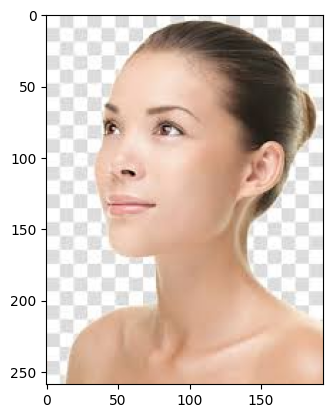

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 64,  71,  90],
        [ 63,  70,  89],
        [ 63,  70,  89],
        ...,
        [ 75,  80, 100],
        [ 70,  75,  95],
        [ 66,  71,  91]],

       [[ 65,  72,  91],
        [ 65,  72,  91],
        [ 65,  72,  91],
        ...,
        [ 77,  82, 102],
        [ 72,  77,  97],
        [ 67,  72,  92]],

       [[ 66,  73,  92],
        [ 67,  73,  92],
        [ 66,  73,  92],
        ...,
        [ 79,  84, 104],
        [ 75,  80, 100],
        [ 71,  76,  96]],

       ...,

       [[ 21,  22,  34],
        [ 24,  24,  36],
        [ 22,  23,  35],
        ...,
        [200, 202, 209],
        [199, 203, 208],
        [197, 202, 206]],

       [[ 17,  19,  31],
        [ 21,  23,  34],
        [ 20,  22,  34],
        ...,
        [202, 204, 212],
        [200, 204, 210],
        [196, 201, 207]],

       [[ 20,  22,  34],
        [ 19,  21,  32],
        [ 16,  18,  30],
        ...,
        [189, 192, 201],
        [196, 200, 208],
        [196, 201, 207]]], dtype=uint8)
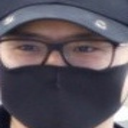

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 72,  65,  94],
        [ 75,  87, 119],
        [ 89, 100, 119],
        ...,
        [ 92, 102, 142],
        [ 91, 101, 135],
        [ 91, 103, 129]],

       [[ 74,  72,  98],
        [ 79,  91, 124],
        [ 92, 102, 124],
        ...,
        [ 90, 102, 140],
        [ 90, 101, 134],
        [ 91, 103, 128]],

       [[ 77,  82, 104],
        [ 86,  97, 131],
        [ 99, 106, 133],
        ...,
        [ 88, 101, 138],
        [ 88, 100, 132],
        [ 89, 101, 126]],

       ...,

       [[ 91, 103,  86],
        [ 90, 102,  85],
        [ 89, 101,  84],
        ...,
        [ 49,  47,  60],
        [ 48,  46,  59],
        [ 23,  21,  34]],

       [[ 90, 103,  85],
        [ 89, 102,  84],
        [ 88, 101,  83],
        ...,
        [ 54,  52,  65],
        [ 38,  36,  49],
        [ 22,  20,  33]],

       [[ 88, 103,  84],
        [ 88, 103,  84],
        [ 87, 102,  83],
        ...,
        [ 52,  50,  63],
        [ 31,  29,  42],
        [ 23,  21,  34]]], dtype=uint8)
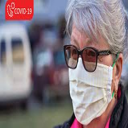

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.28235294, 0.25490196, 0.36862745],
        [0.29411765, 0.34117647, 0.46666667],
        [0.34901961, 0.39215686, 0.46666667],
        ...,
        [0.36078431, 0.4       , 0.55686275],
        [0.35686275, 0.39607843, 0.52941176],
        [0.35686275, 0.40392157, 0.50588235]],

       [[0.29019608, 0.28235294, 0.38431373],
        [0.30980392, 0.35686275, 0.48627451],
        [0.36078431, 0.4       , 0.48627451],
        ...,
        [0.35294118, 0.4       , 0.54901961],
        [0.35294118, 0.39607843, 0.5254902 ],
        [0.35686275, 0.40392157, 0.50196078]],

       [[0.30196078, 0.32156863, 0.40784314],
        [0.3372549 , 0.38039216, 0.51372549],
        [0.38823529, 0.41568627, 0.52156863],
        ...,
        [0.34509804, 0.39607843, 0.54117647],
        [0.34509804, 0.39215686, 0.51764706],
        [0.34901961, 0.39607843, 0.49411765]],

       ...,

       [[0.35686275, 0.40392157, 0.3372549 ],
        [0.35294118, 0.4       , 0.33333333],
        [0.34901961, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=12)

Epoch 1/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - acc: 0.7278 - loss: 0.5564 - val_acc: 0.8810 - val_loss: 0.2732
Epoch 2/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - acc: 0.8926 - loss: 0.2943 - val_acc: 0.8992 - val_loss: 0.2121
Epoch 3/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8931 - loss: 0.2633 - val_acc: 0.9058 - val_loss: 0.2057
Epoch 4/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9200 - loss: 0.2135 - val_acc: 0.9107 - val_loss: 0.1874
Epoch 5/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9429 - loss: 0.1680 - val_acc: 0.9240 - val_loss: 0.1800
Epoch 6/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9443 - loss: 0.1442 - val_acc: 0.9124 - val_loss: 0.2271
Epoch 7/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9425 - loss: 0.1470 - val_acc: 0.9240 - val_loss: 0.2019
Epoch 8/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9548 - loss: 0.1186 - val_acc: 0.9273 - val_loss: 0.2225
Epoch 9/12
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17m

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9432 - loss: 0.2800
Test Accuracy = 0.9397749900817871


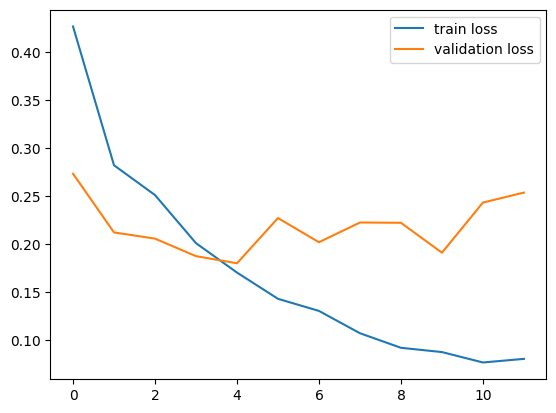

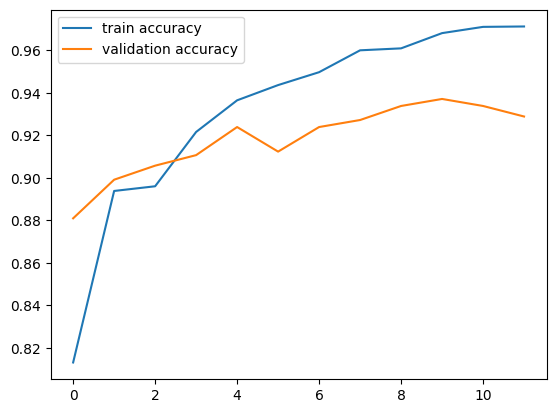

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Enter the path to the image in your Dataset: /content/drive/MyDrive/CSE438_DIP_LAB/PROJECT/1920x1080 Banner 2.jpg.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


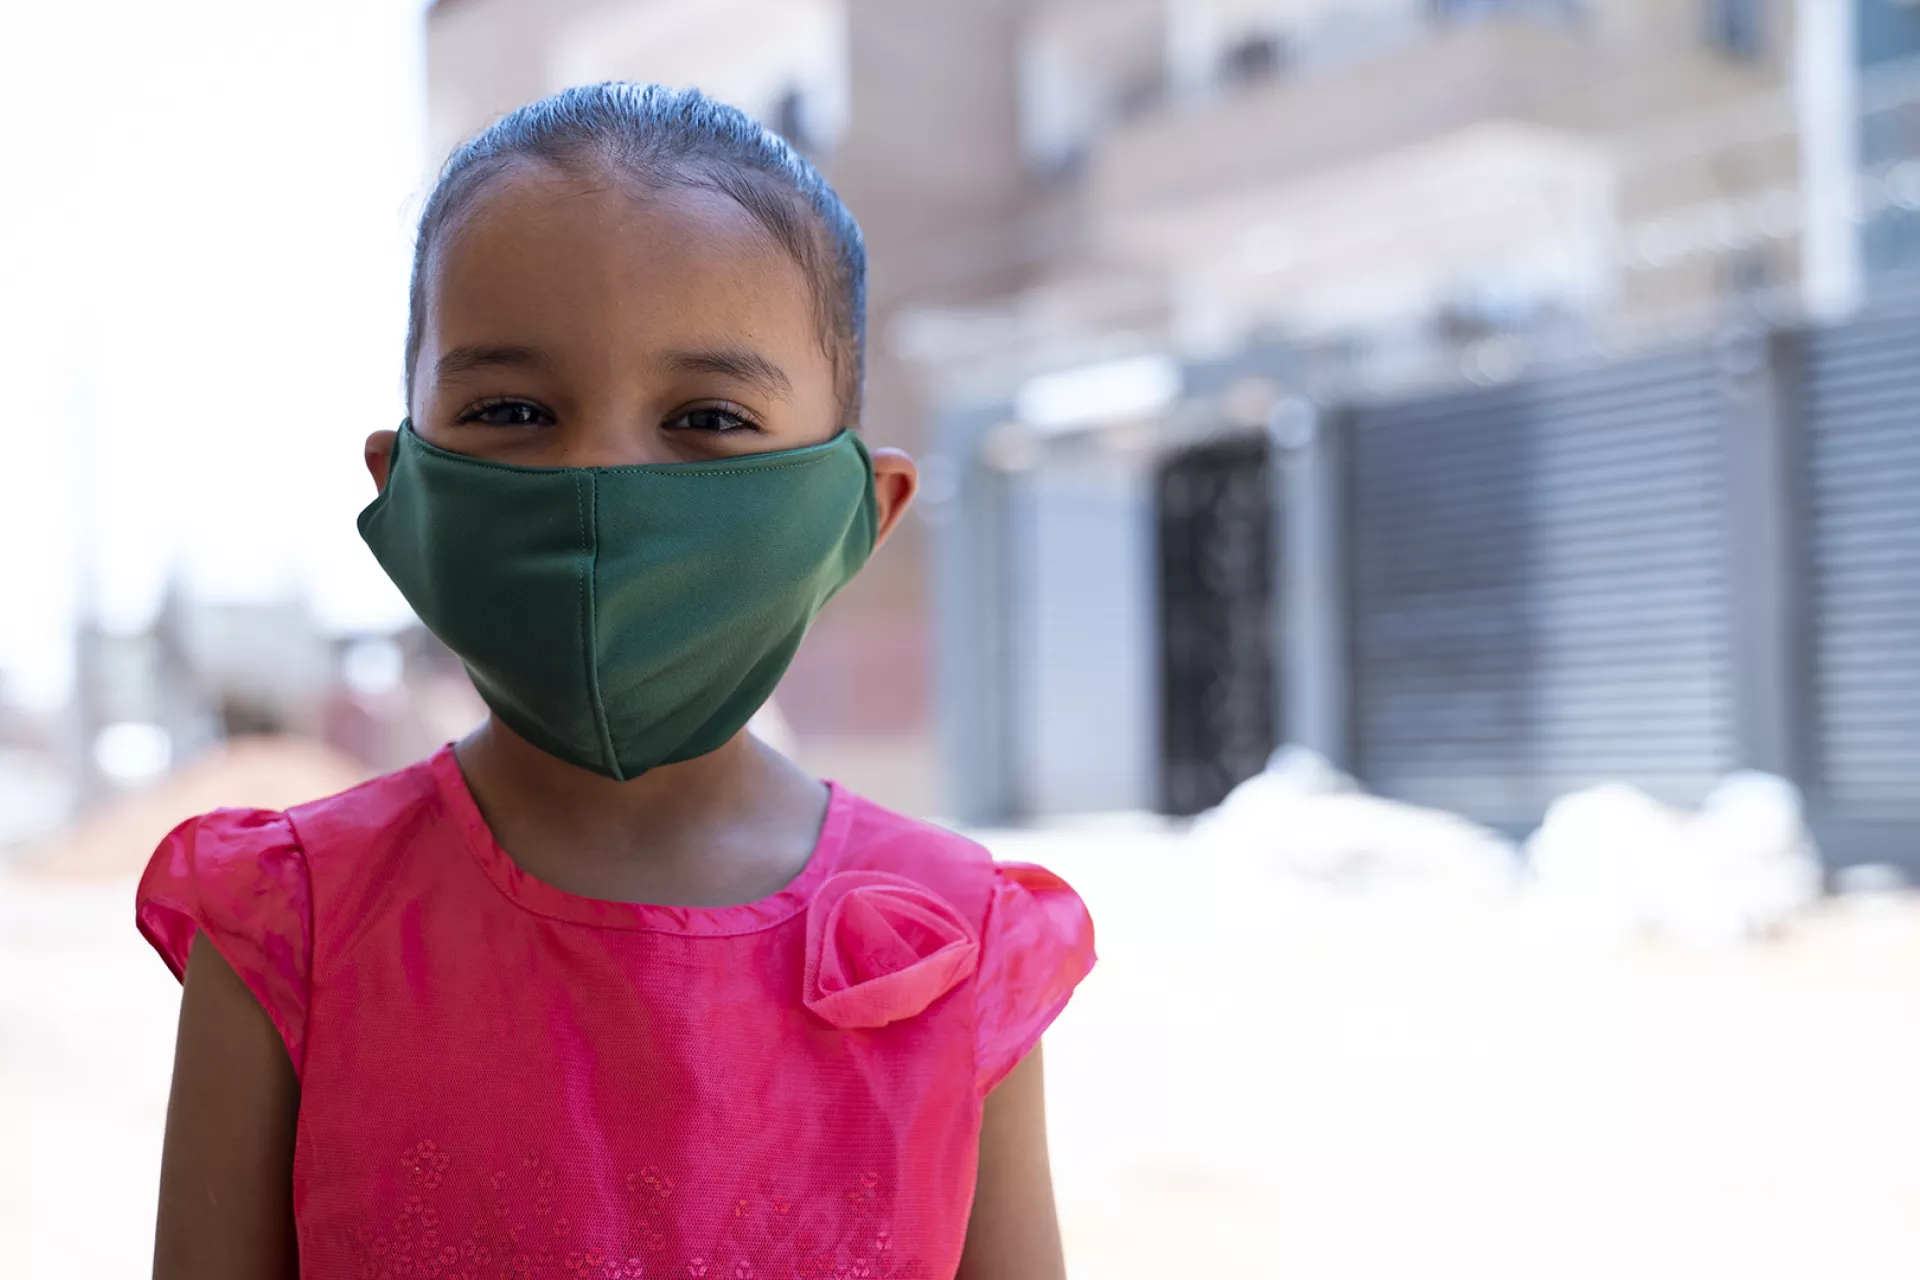

Prediction: Wearing Mask


In [ ]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow

def predict_mask(image_path):
  # Load the image and preprocess it
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 128))
  img = img / 255.0  # Scale pixel values
  img = np.expand_dims(img, axis=0)  # Add batch dimension

  # Make the prediction
  prediction = model.predict(img)
  predicted_class = np.argmax(prediction)

  # Return the prediction
  if predicted_class == 1:
    return "Wearing Mask"
  else:
    return "No Mask"

# Get the image path from the user
image_path = input("Enter the path to the image in your Dataset: ")

# Predict the mask status
prediction = predict_mask(image_path)

# Display the image and prediction
img = cv2.imread(image_path)
cv2_imshow(img)
print(f"Prediction: {prediction}")

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predictions to class labels

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Calculate precision and recall
precision = precision_score(Y_test, Y_pred_classes)
recall = recall_score(Y_test, Y_pred_classes)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
Precision: 0.9393530997304582
Recall: 0.9380888290713324


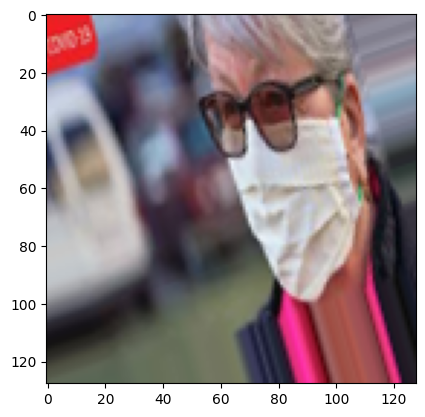

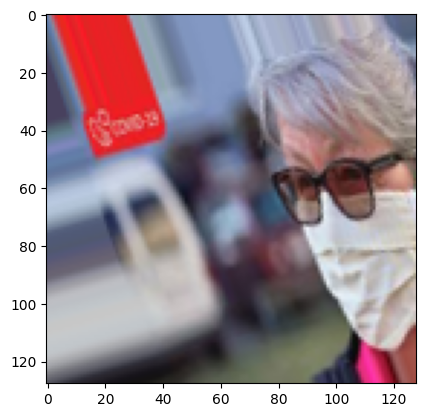

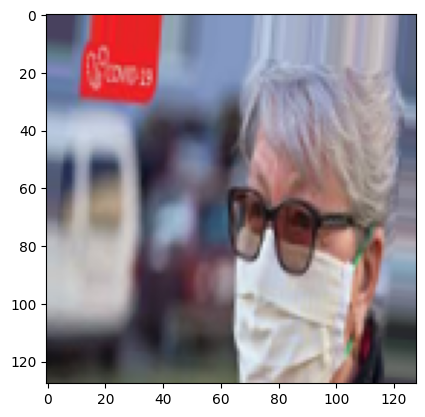

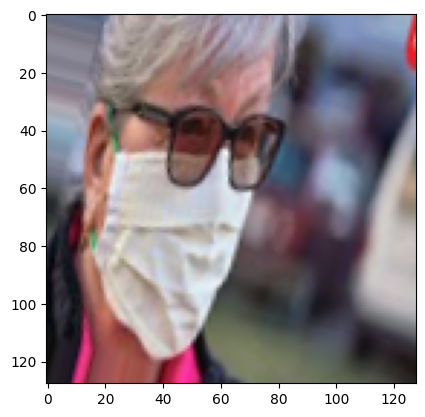

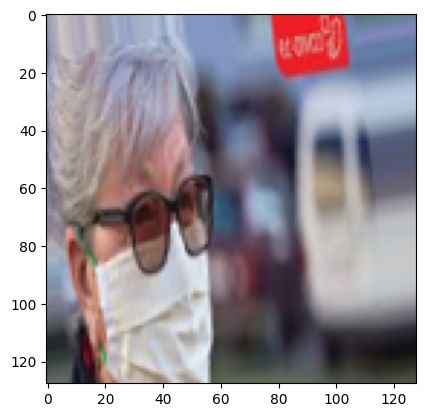

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have your image data in X_train

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Pick an image from your training set for demonstration
img = X_train[0]
img = img.reshape((1,) + img.shape)  # Reshape to (1, 128, 128, 3)

# Generate and display augmented images
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))  # Convert to uint8 for display
    i += 1
    if i > 4:  # Generate 5 augmented images
        break
    plt.show()


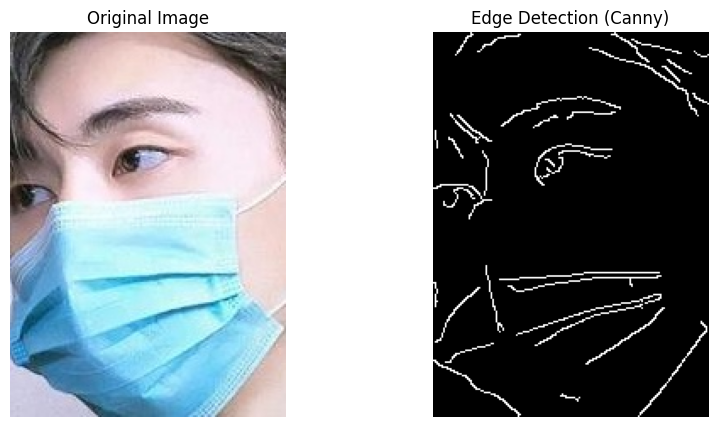

In [ ]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from the dataset (you can replace this with any image path from the dataset)
image_path = '/content/data/with_mask/with_mask_1545.jpg'  # Change to any image in your dataset
image = cv2.imread(image_path)

# Convert the image to grayscale
# Canny edge detection works on grayscale images
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
# Kernel size (5,5) and standard deviation of 0 for automatic calculation
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Canny edge detection with lower and upper thresholds
# Lower threshold is 100, and upper threshold is 200
edges = cv2.Canny(blurred_image, 100, 200)

# Displaying the original image and the image with detected edges
plt.figure(figsize=(10, 5))

# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying correctly
plt.title('Original Image')
plt.axis('off')  # Hide axes for a cleaner look

# Subplot 2: Image with Canny Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')  # Display edge-detected image in grayscale
plt.title('Edge Detection (Canny)')
plt.axis('off')

plt.show()


 Histogram Equalization

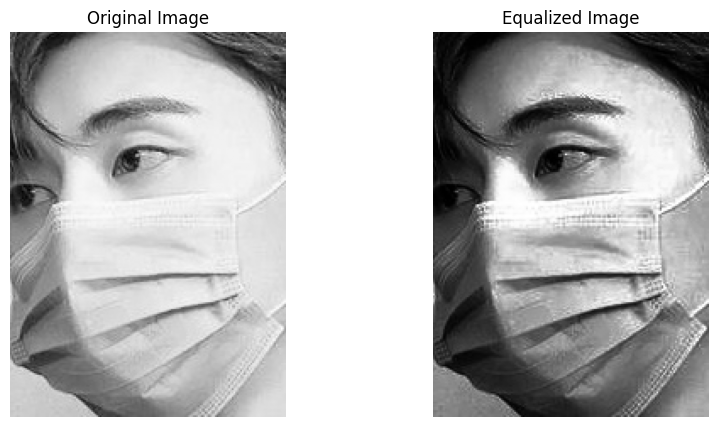

In [ ]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from the dataset (you can replace this with any image path from the dataset)
image_path = '/content/data/with_mask/with_mask_1545.jpg'  # Change to any image in your dataset
image = cv2.imread(image_path)

# Convert the image to grayscale (Histogram equalization works on grayscale images)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# Displaying the original image and the equalized image
plt.figure(figsize=(10, 5))

# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')  # Display original grayscale image
plt.title('Original Image')
plt.axis('off')  # Hide axes for a cleaner look

# Subplot 2: Histogram Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')  # Display equalized image
plt.title('Equalized Image')
plt.axis('off')

plt.show()


Gaussian Blur Filter

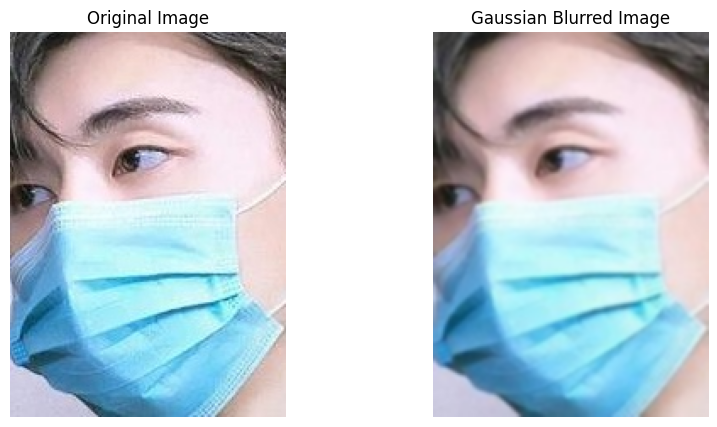

In [ ]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from the dataset
image_path = '/content/data/with_mask/with_mask_1545.jpg'  # Change to any image in your dataset
image = cv2.imread(image_path)

# Apply Gaussian Blur
# The kernel size (5, 5) determines the extent of smoothing, can be adjusted
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Displaying the original image and the blurred image
plt.figure(figsize=(10, 5))

# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.title('Original Image')
plt.axis('off')

# Subplot 2: Image with Gaussian Blur
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.show()
